# Simulations Homework

In [2]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

---

### Reset Generator Function

If you didn't do so in class, write a function to reseed the numpy random number generator. It should default to setting the seed to 42, but be able to set it to whatever you want.

In [3]:
def reset_rng(seed):
    data = np.random.default_rng(seed)
    
    return data

Reset the generator using your function.

In [4]:
rng = reset_rng(42)

---

### "Accept Cookies" Simulation

Assuming the base rate for hitting the "Accept Cookies" button when landing on a website is 85%, do a set of 10,000 simulations of 20 people visiting a given website and accepting cookies. 

In [5]:
p = 0.85
n_ppl = 20
n_sim = 10000

accept_cookies = rng.binomial(n_ppl, p, n_sim)

Based on your simulation, what is the probability of getting exactly 15 accepts? 

In [6]:
np.sum(accept_cookies == 15)/n_sim

0.1

What is the probability of getting *at least* 15 accepts?

In [7]:
at_least_15 = np.sum(accept_cookies >= 15)/n_sim
at_least_15

0.9339

What is the probability of getting fewer than 15 accepts?

In [8]:
fewer_than_15 = np.sum(accept_cookies < 15)/n_sim
fewer_than_15

0.0661

Confirm that the last two probabilities computed sum to 1.0.

In [9]:
at_least_15 + fewer_than_15

1.0

---

### What Is and Isn't Binomial?

Check the binomial approximation for the election simulations from the in-class notebook for the cases in which we did and didn't account for the poll-to-poll variability arising from a single poll.

What is the expected standard deviation for our distribution of election outcomes based on the normal approximation?

In [10]:
n_voters = 100000
p_A_win = 0.51

sd = np.sqrt(n_voters * p_A_win * (1-p_A_win))
sd

158.082257068907

What was the empirical standard deviation of the distribution of election outcomes when we only used a single probability? ("*single poll, many elections*")

(You can just copy and paste the code from the in-class notebook to regenerate the simulated election outcomes.)

In [11]:
n_voters = 100000
p_A_win = 0.51
n_experiments = 20000

votes_for_a = rng.binomial(n_voters, p_A_win, n_experiments)

In [12]:
singlePoll_sd = np.std(votes_for_a)
singlePoll_sd

158.09579697100583

What was the empirical standard deviation of the distribution of election outcomes when we accounted for random variation in poll outcomes in our simulation? ("*simulate poll -> simulate election*")

In [13]:
p = 0.51
n = 2000
n_sim = 20000

vote_A = rng.binomial(n, p, n_sim)

prob_vote_A = vote_A/n

new_turnout = 100000

vote_A_election = rng.binomial(new_turnout, p = prob_vote_A, size = n_sim)

In [14]:
simulatePoll_sd = np.std(vote_A_election)
simulatePoll_sd

1123.588999968654

---

### Effect of Poll Sample Size

As you have probably realized, these distributions of outcomes from many experiments we've been generating are, by definition, ***sampling distributions***! One firm law about sampling distributions is that their width depends strongly on sample size. As such, we would expect our simulated election outcomes to be affected by the size of the poll on which they are based.

In the cell below, run the *simulate poll -> simulate elections* code for poll sample sizes of 50, 100, 500, 1000, 2000 and 5000. For each sample size, record the obtained standard deviation of the distribution of outcomes. (pro tip: make a new code cell below and put them in a Python list)

In [15]:
 # reset generator
rng = reset_rng(42)

In [16]:
 # simulate
p = 0.51
n = [50, 100, 500, 1000, 2000, 5000]
n_sim = 20000

new_turnout = 100000

stds = []

for i in range(len(n)):
    vote_A = rng.binomial(n[i], p, n_sim)
    prob_vote_A = vote_A/n[i]
    vote_A_election = rng.binomial(new_turnout, p = prob_vote_A, size = n_sim)
    elec_std = np.std(vote_A_election)
    stds.append(elec_std)

In [17]:
stds

[7088.501063801182,
 4977.141265720489,
 2239.742277342864,
 1584.9314488554735,
 1123.7839002359117,
 725.195322015688]

Make a plot of standard deviation of outcomes (y-axis) vs. poll sample size (x-axis).

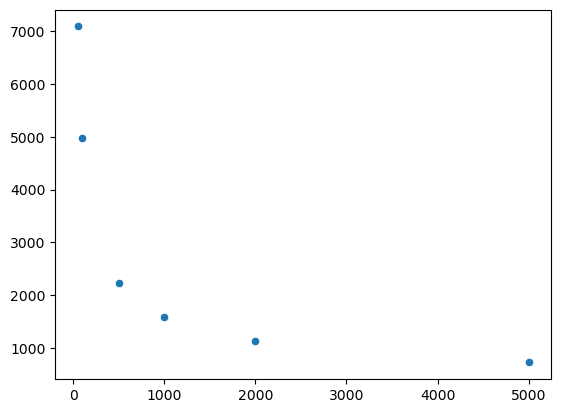

In [181]:
sns.scatterplot(x = n, y = stds);

Based on this plot, why do you think almost all polls sample around 2000 people?

A poll sample of around 2000 people produces less variability in poll results than a sample of less than 2000 people. Furthermore, there is slim variability between sampling 2000 people and 5000 people, so it is unnecessary to sample more than around 2000 people.

---

### Re-Write the Multi-Poll Code 

The code for combining three polls using a weighted average works, but it is awkward. Changing it to handle a different number of polls would involve lots of copying and pasting and mistake-prone editing.

Make the code "Pythonic" so that all you have to do is provide a list (or tuple) of poll results and another for poll weights, and your code will do the rest. 

Your code can be just code in a code cell. But if you're feeling spicy, you could make it a function!

In [18]:
polls = [0.53, 0.31, 0.515]
weights = [2, 4, 3]

sum_of_w = np.sum(weights)
samp_sz = 2000                       
n_sims = 20000 
n_voters = 100000 

all_poll_results = []
all_poll_probs = []
all_elec_results = []

for i in range(len(polls)): 
    individual_poll_results = rng.binomial(samp_sz, polls[i], n_sims)
    all_poll_results.append(individual_poll_results)

    individual_poll_probs = all_poll_results[i]/samp_sz
    all_poll_probs.append(individual_poll_probs)

    individual_elec_results = rng.binomial(n_voters, all_poll_probs[i], n_sims)
    all_elec_results.append(individual_elec_results)

all_weighted_results = []

for i in range(len(weights)):
    weighted_results = weights[i] * all_elec_results[i]
    all_weighted_results.append(weighted_results)

    final_elec_results = np.sum(all_weighted_results, axis=0) / sum_of_w

final_elec_results

array([41993.44444444, 42725.77777778, 44573.        , ...,
       42626.66666667, 43085.55555556, 42090.66666667])

---

### Weight polls by sample size

Use your new code to compute predicted election outcomes based on 5 polls weighted by the sample sizes of the polls (or their square root, if you prefer – wink wink, nudge nudge). The polls are as follows:

`poll_ests = [.51, .55, .53, .49, 0.50]`

`poll_samp_szs = [2000, 1000, 1500, 1200, 1142]`

In [19]:
poll_ests = [.51, .55, .53, .49, 0.50]
poll_samp_szs = [2000, 1000, 1500, 1200, 1142]

weights = np.sqrt(poll_samp_szs)

sum_of_w = np.sum(weights)
n_sims = 20000 
n_voters = 100000 

all_poll_results = []
all_poll_probs = []
all_elec_results = []

for i in range(len(poll_ests)): 
    individual_poll_results = rng.binomial(poll_samp_szs[i], poll_ests[i], n_sims)
    all_poll_results.append(individual_poll_results)

    individual_poll_probs = all_poll_results[i]/poll_samp_szs[i]
    all_poll_probs.append(individual_poll_probs)

    individual_elec_results = rng.binomial(n_voters, all_poll_probs[i], n_sims)
    all_elec_results.append(individual_elec_results)

all_weighted_results = []

for i in range(len(weights)):
    weighted_results = weights[i] * all_elec_results[i]
    all_weighted_results.append(weighted_results)

    final_elec_results = np.sum(all_weighted_results, axis=0) / sum_of_w


np.mean(final_elec_results)

51547.946270129694

Make a plot of the distribution of simulated outcomes, with the area representing the underdog winning highlighted.

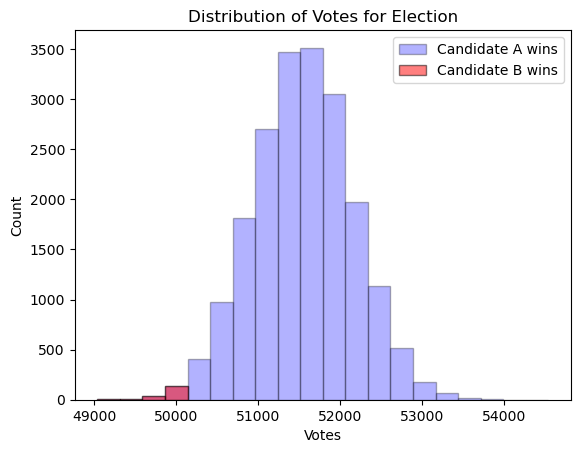

In [22]:
threshold = 0.5 * n_voters

# histogram bins and counts
count, bins = np.histogram(final_elec_results, bins=20) # Get the histog
bin_width = bins[1] - bins[0]
bin_center = bins[:-1] + bin_width/2

plt.bar(bin_center, count,
        width=bin_width, color='b', edgecolor='k', alpha = 0.3, label = "Candidate A wins")
plt.bar(bin_center[bin_center < threshold], count[bin_center < threshold],
        width=bin_width, color='r', edgecolor='k', alpha=0.5, label = "Candidate B wins")

plt.xlabel('Votes')
plt.ylabel('Count')
plt.title('Distribution of Votes for Election')
plt.legend();

---

Bonus (totally optional): 
Write your own function, `my_binom()` that does the same thing as `rng.binomial()`. The function should use `rng.random()` internally. To the user, it should behave just like `rng.binomial()`!

---